In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score,classification_report, confusion_matrix
seaborn.set()
%matplotlib inline

In [19]:
raw_data = pd.read_csv('ChurnData.csv')
raw_data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [20]:
churn_df = raw_data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

/tmp/ipykernel_22375/1490388225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn'] = churn_df['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [21]:
churn_df.shape[0]

200

In [22]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

In [23]:
inputs = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]
targets = churn_df['churn']

In [24]:
inputs_preprocessed = preprocessing.StandardScaler().fit(inputs).transform(inputs)
inputs_preprocessed

array([[-1.14, -0.63, -0.46, ...,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, ..., -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, ..., -1.42, -0.92, -0.86],
       ...,
       [-1.37, -0.7 , -0.16, ..., -1.42, -0.03, -0.86],
       [-0.53, -0.86, -1.15, ...,  0.92, -0.58, -0.86],
       [ 1.18,  0.68,  0.43, ..., -0.64,  1.32,  1.16]])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=4)

In [26]:
LogReg = LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train)

In [27]:
yhat = LogReg.predict(x_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [28]:
yhat_prob = LogReg.predict_proba(x_test)
yhat_prob

array([[0.84, 0.16],
       [0.87, 0.13],
       [0.75, 0.25],
       [0.89, 0.11],
       [0.73, 0.27],
       [0.5 , 0.5 ],
       [0.62, 0.38],
       [0.86, 0.14],
       [0.41, 0.59],
       [0.9 , 0.1 ],
       [0.9 , 0.1 ],
       [0.94, 0.06],
       [0.46, 0.54],
       [0.49, 0.51],
       [0.83, 0.17],
       [0.81, 0.19],
       [0.68, 0.32],
       [0.83, 0.17],
       [0.77, 0.23],
       [0.63, 0.37],
       [0.85, 0.15],
       [0.66, 0.34],
       [0.93, 0.07],
       [0.54, 0.46],
       [0.78, 0.22],
       [0.94, 0.06],
       [0.73, 0.27],
       [0.8 , 0.2 ],
       [0.58, 0.42],
       [0.96, 0.04],
       [0.89, 0.11],
       [0.88, 0.12],
       [0.41, 0.59],
       [0.9 , 0.1 ],
       [0.87, 0.13],
       [0.74, 0.26],
       [0.36, 0.64],
       [0.53, 0.47],
       [0.96, 0.04],
       [0.86, 0.14],
       [0.93, 0.07],
       [0.78, 0.22],
       [0.88, 0.12],
       [0.91, 0.09],
       [0.92, 0.08],
       [0.49, 0.51],
       [0.97, 0.03],
       [0.96,

In [29]:
jaccard_score(y_test, yhat, pos_label=0)

0.7142857142857143

In [30]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize = False,
                          title = "ConfusionMatrix",
                          cmap = plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("NORMALIZED CONFUSION MATRIX")
    else:
        print("CONFUSION MATRIX WITHOUT NORMALIZATION")
    print(cm)

    plt.imshow(cm , interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 4 13]
 [ 3 40]]


CONFUSION MATRIX WITHOUT NORMALIZATION
[[ 4 13]
 [ 3 40]]


/tmp/ipykernel_22375/20666242.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


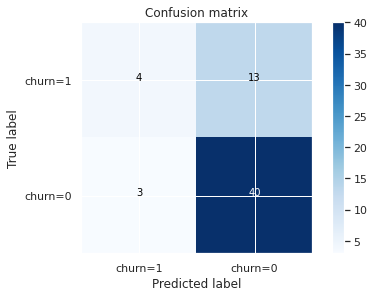

In [33]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [32]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        43
           1       0.57      0.24      0.33        17

    accuracy                           0.73        60
   macro avg       0.66      0.58      0.58        60
weighted avg       0.70      0.73      0.69        60

